In [1]:
import pandas as pd
import numpy as np
from scipy import signal, fft
import csv
from pylab import *
import matplotlib.pyplot as plt 

In [2]:
#4th order butter bandpass filter
def butter_bandpass(lowcut, highcut, fs, order = 4):
    nyq = 0.5*fs
    low = lowcut/nyq
    high = highcut/nyq
    b, a = signal.butter(order, [low, high], btype = 'band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order = 4):
    b, a = butter_bandpass(lowcut, highcut, fs, order)
    y = signal.lfilter(b,a, data)
    return y

#loading dataset
def read_files(in_path, in_name, out_path, out_name):
    lines=list()
    for i in range(1, 101):
        name = in_name+str(i).zfill(3)+".txt"
        #print(name)
        with open(in_path+name, 'r') as in_file:
            lines.append([line.strip() for line in in_file])
            in_file.close()
    df=pd.DataFrame(lines, columns=None, index=None)
    df.to_csv(out_path+out_name+".csv", header=None, index=None)

In [3]:
#loading dataset
path = "D:\\Education\\Projects\\SeizureDetection\\try2\\"
read_files(path + "data\\setB\\", "O", path + "files\\", "setB" )
read_files(path + "data\\setC\\", "N", path + "files\\", "setC")
read_files(path + "data\\setE\\", "S", path + "files\\", "setE" )

In [4]:
#importing data
path = "D:\\Education\\Projects\\SeizureDetection\\try2\\"
dfB = pd.read_csv(path + "files\\setB.csv", header=None, names=None).values
dfC = pd.read_csv(path + "files\\setC.csv", header=None).values
dfE = pd.read_csv(path + "files\\setE.csv", header=None).values
print(type(dfB), dfB.shape)
print(type(dfC), dfC.shape)
print(type(dfE), dfE.shape)

<class 'numpy.ndarray'> (100, 4097)
<class 'numpy.ndarray'> (100, 4097)
<class 'numpy.ndarray'> (100, 4097)


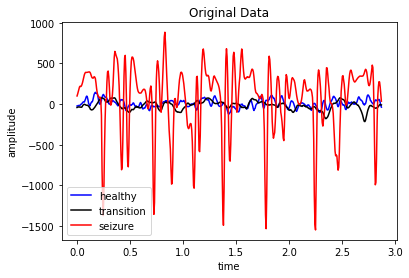

In [5]:
fs=173.61
tlen = 23.6
tt=arange(0, round(tlen*fs))/float(fs)

fig = plt.figure(1)
plt.plot(tt[:500], dfB[0][:500], color = 'b', label = 'healthy')
plt.plot(tt[:500], dfC[0][:500], color = 'k', label = 'transition')
plt.plot(tt[:500], dfE[0][:500], color = 'r', label = 'seizure')
plt.legend()
plt.xlabel('time')
plt.ylabel('amplitude')
plt.title('Original Data')
plt.show()
#fig.savefig(path+"files//"+"original_signals.png")

In [6]:
#creating a dataset
data = np.concatenate((dfB, dfC, dfE), axis=0)
#print(type(dfB))

Preprocessing data by filtering with 4th order bandpass filter

In [7]:
#filtering dataset
lowcut = 2
highcut = 64
filtered=list()
for sig in data:
    k = butter_bandpass_filter(sig, lowcut, highcut, fs, order = 4)
    filtered.append(k)
filtered=np.array(filtered)

In [8]:
#saving filtered data
#np.savetxt(path + "files\\"+"data_filter.csv", filtered, delimiter=',')

<Figure size 432x288 with 0 Axes>

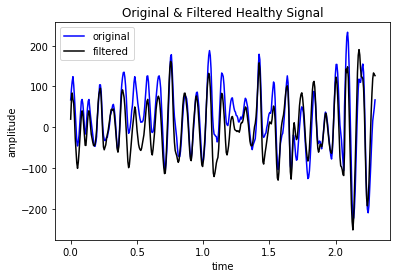

In [9]:
#plotting filtered data
#healthy
plt.clf()
fig = plt.figure()
plt.plot(tt[:400], data[45][:400], color = 'b', label='original')
plt.plot(tt[:400], filtered[45][:400], color = 'k', label='filtered')
plt.legend()
plt.xlabel('time')
plt.ylabel('amplitude')
plt.title('Original & Filtered Healthy Signal')
plt.show()
fig.savefig(path+"files//"+"original_filtered_healthy.png")

<Figure size 432x288 with 0 Axes>

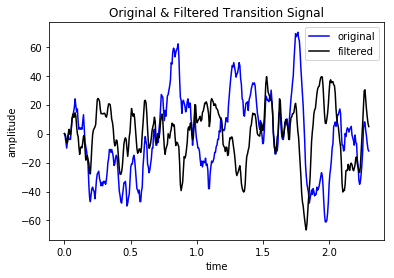

In [10]:
#Inter-ictal
plt.clf()
fig = plt.figure()
plt.plot(tt[:400], data[145][:400], color = 'b', label='original')
plt.plot(tt[:400], filtered[145][:400], color = 'k', label='filtered')
plt.legend()
plt.xlabel('time')
plt.ylabel('amplitude')
plt.title('Original & Filtered Transition Signal')
plt.show()
fig.savefig(path+"files//"+"original_filtered_transition.png")

<Figure size 432x288 with 0 Axes>

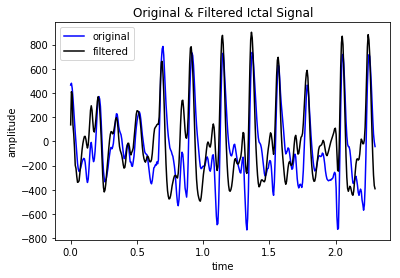

In [11]:
#ictal
plt.clf()
fig = plt.figure()
plt.plot(tt[:400], data[245][:400], color = 'b', label='original')
plt.plot(tt[:400], filtered[245][:400], color = 'k', label='filtered')
plt.legend()
plt.xlabel('time')
plt.ylabel('amplitude')
plt.title('Original & Filtered Ictal Signal')
plt.show()
fig.savefig(path+"files//"+"original_filtered_ictal.png")

In [12]:
#fft frequency
fft_freq = np.fft.fftfreq(len(filtered), 1.0/fs)
print(fft_freq.shape)

(300,)


In [22]:
fft_freq

array([  0.    ,   0.5787,   1.1574,   1.7361,   2.3148,   2.8935,
         3.4722,   4.0509,   4.6296,   5.2083,   5.787 ,   6.3657,
         6.9444,   7.5231,   8.1018,   8.6805,   9.2592,   9.8379,
        10.4166,  10.9953,  11.574 ,  12.1527,  12.7314,  13.3101,
        13.8888,  14.4675,  15.0462,  15.6249,  16.2036,  16.7823,
        17.361 ,  17.9397,  18.5184,  19.0971,  19.6758,  20.2545,
        20.8332,  21.4119,  21.9906,  22.5693,  23.148 ,  23.7267,
        24.3054,  24.8841,  25.4628,  26.0415,  26.6202,  27.1989,
        27.7776,  28.3563,  28.935 ,  29.5137,  30.0924,  30.6711,
        31.2498,  31.8285,  32.4072,  32.9859,  33.5646,  34.1433,
        34.722 ,  35.3007,  35.8794,  36.4581,  37.0368,  37.6155,
        38.1942,  38.7729,  39.3516,  39.9303,  40.509 ,  41.0877,
        41.6664,  42.2451,  42.8238,  43.4025,  43.9812,  44.5599,
        45.1386,  45.7173,  46.296 ,  46.8747,  47.4534,  48.0321,
        48.6108,  49.1895,  49.7682,  50.3469,  50.9256,  51.5

<Figure size 432x288 with 0 Axes>

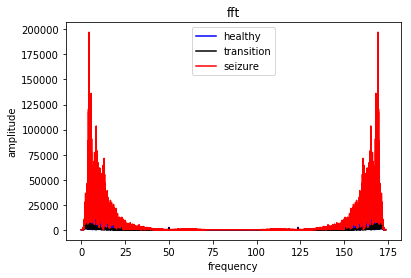

In [13]:
plt.clf()
fig = plt.figure()
fft_h = fft(filtered[45])
fft_t = fft(filtered[145])
fft_s = fft(filtered[245])
f=np.linspace(0, fs, len(filtered[0]), endpoint=False)
plt.plot(f, abs(fft_h), color = 'b', label = 'healthy')
plt.plot(f, abs(fft_t), color = 'k', label = 'transition')
plt.plot(f, abs(fft_s), color = 'r', label = 'seizure')
plt.legend()
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.title('fft')
plt.show()
#fig.savefig(path+"files//"+"fft.png")

In [23]:
#deriving features : fft_sig, power, zero crossings, sliding variance
power=list()
zero_crossing=list()
sliding_variance=list()
fft_sig=list()
for sig in filtered:
    #calculating fft
    fft_sig.append(np.array(fft(sig)))
    #calculating power
    p=0
    for k in sig:
        p += k*k
    power.append(p)
    
    #calculating zero crossings
    zero = 0
    for _ in range(len(sig)-1):
        if sig[_]*sig[_+1] < 0:
            zero += 1
    zero_crossing.append(zero)     
   
    #calculating sliding variance
    sig=pd.DataFrame(sig)
    variance = sig.rolling(window = 4, min_periods = 1).var()
    var_mean = 0
    for _ in range(1, len(variance.values)):
        var_mean+=variance.values[_]
    var_mean = var_mean/(len(variance.values)-1)
    sliding_variance.append(var_mean)

In [24]:
np.array(fft_sig).shape

(300, 4097)

In [25]:
label=list()
for i in range(0, 100):
    label.append(-1)
for i in range(100, 200):
    label.append(0)
for i in range(200, 300):
    label.append(1)

dataset=pd.DataFrame()
#dataset['freq'] = fft_freq
dataset['power'] = power
dataset['zero_crossing'] = zero_crossing
dataset['sliding_variance'] = sliding_variance
dataset['label'] = label

#dataset.to_csv(path + "files//" + "dataset_processed.csv", index = False)

<Figure size 432x288 with 0 Axes>

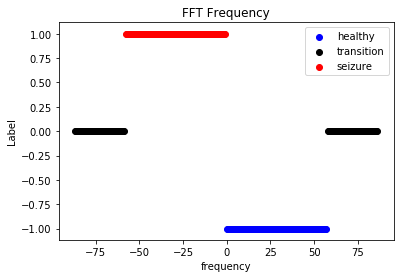

In [26]:
#plotting fft frequency
plt.clf()
fig = plt.figure()
plt.scatter(fft_freq[:99], label[:99], label = 'healthy', color = 'b')
plt.scatter(fft_freq[100:199], label[100:199], label = 'transition', color = 'k')
plt.scatter(fft_freq[200:299], label[200:299], label = 'seizure', color = 'r')
#plt.axis([min(fft_freq)-5, max(fft_freq)+5, -2, 2])
plt.legend()
plt.xlabel('frequency')
plt.ylabel('Label')
plt.title('FFT Frequency')
plt.show()
#fig.savefig(path+"files//"+"fft_freq.png")

<Figure size 432x288 with 0 Axes>

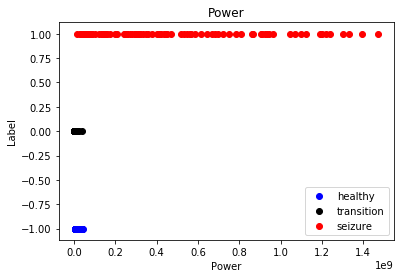

In [27]:
#plotting power
plt.clf()
fig = plt.figure()
plt.scatter(power[:99], label[:99], label = 'healthy', color = 'b')
plt.scatter(power[100:199], label[100:199], label = 'transition', color = 'k')
plt.scatter(power[200:299], label[200:299], label = 'seizure', color = 'r')
plt.legend()
plt.xlabel('Power')
plt.ylabel('Label')
plt.title('Power')
plt.show()
#fig.savefig(path+"files//"+"power.png")

<Figure size 432x288 with 0 Axes>

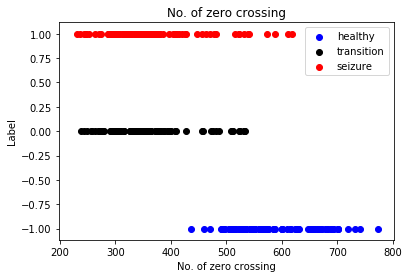

In [28]:
#plotting zero crossing
plt.clf()
fig = plt.figure()
plt.scatter(zero_crossing[:99], label[:99], label = 'healthy', color = 'b')
plt.scatter(zero_crossing[100:199], label[100:199], label = 'transition', color = 'k')
plt.scatter(zero_crossing[200:299], label[200:299], label = 'seizure', color = 'r')
#plt.axis([min(fft_freq)-5, max(fft_freq)+5, -2, 2])
plt.legend()
plt.xlabel('No. of zero crossing')
plt.ylabel('Label')
plt.title('No. of zero crossing')
plt.show()
#fig.savefig(path+"files//"+"zero_crossing.png")

<Figure size 432x288 with 0 Axes>

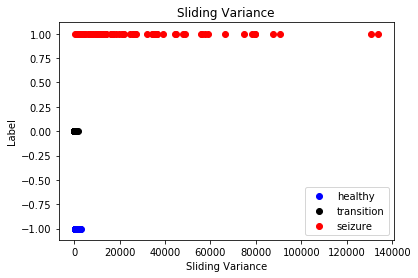

In [29]:
#plotting slidng variance
plt.clf()
fig = plt.figure()
plt.scatter(sliding_variance[:99], label[:99], label = 'healthy', color = 'b')
plt.scatter(sliding_variance[100:199], label[100:199], label = 'transition', color = 'k')
plt.scatter(sliding_variance[200:299], label[200:299], label = 'seizure', color = 'r')
#plt.axis([min(fft_freq)-5, max(fft_freq)+5, -2, 2])
plt.legend()
plt.xlabel('Sliding Variance')
plt.ylabel('Label')
plt.title('Sliding Variance')
plt.show()
#fig.savefig(path+"files//"+"sliding_variance.png")

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier



features = dataset[dataset.columns[:-1]]
label = dataset[dataset.columns[-1]]

features_train, features_test, label_train, label_test = train_test_split(features, label, test_size = 0.2)

#classifying
clf = RandomForestClassifier()
clf.fit(features_train, label_train)

#testing
pred = clf.predict(features_test)

#performance
accuracy = accuracy_score(pred, label_test)
print("Accuracy = ", accuracy)
print(confusion_matrix(label_test, pred))

Accuracy =  0.9666666666666667
[[32  0  0]
 [ 3 25  0]
 [ 0  0 30]]


C:\Users\CG-DTE\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [33]:
features.head(5)

,power,zero_crossing,sliding_variance
0,6.861785e+06,522,[379.2735663439423]
1,6.815503e+06,517,[377.48574541498965]
2,8.718534e+06,552,[514.660701894245]
3,1.251896e+07,546,[744.5281496912535]
4,1.062196e+07,549,[695.07938431746]
